In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv")
df

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [6]:
df.shape

(213, 10)

In [7]:
df.head(10)

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
5,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
6,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
7,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
8,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1
9,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,1


In [9]:
names = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Glass_Type']
df.columns = names
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          213 non-null    float64
 1   Na          213 non-null    float64
 2   Mg          213 non-null    float64
 3   Al          213 non-null    float64
 4   Si          213 non-null    float64
 5   K           213 non-null    float64
 6   Ca          213 non-null    float64
 7   Ba          213 non-null    float64
 8   Fe          213 non-null    float64
 9   Glass_Type  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [11]:
df.dtypes

RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
Glass_Type      int64
dtype: object

In [12]:
df.isnull().sum()

RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Glass_Type    0
dtype: int64

In [13]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


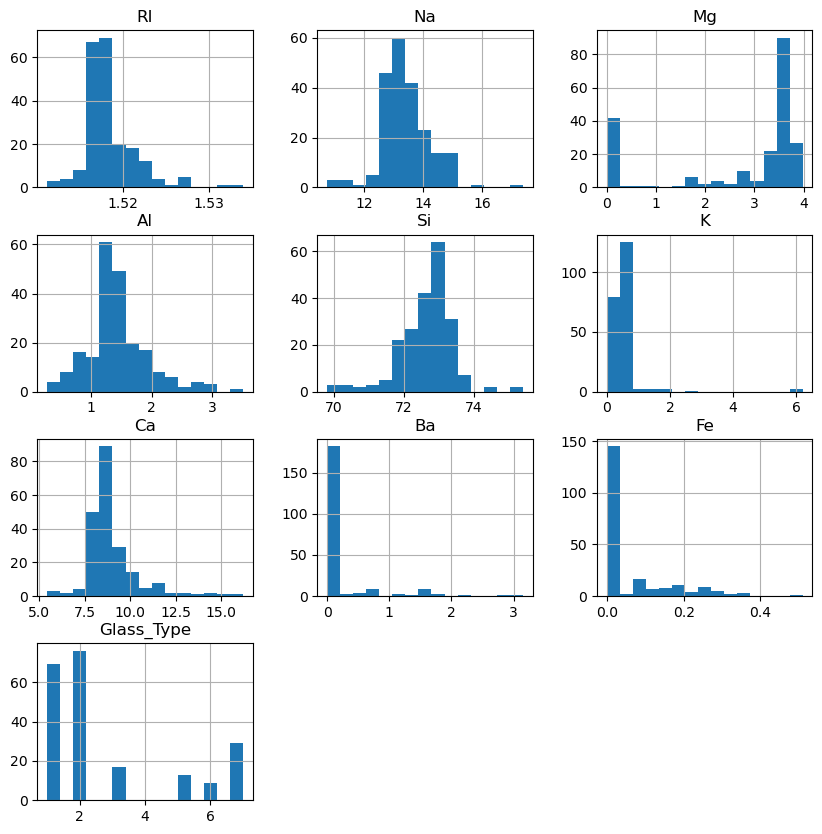

In [14]:
df.hist(bins=15, figsize=(10, 10))
plt.show()

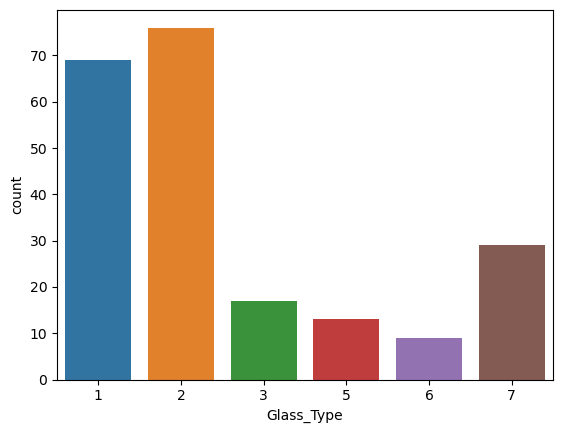

In [16]:
sns.countplot(x='Glass_Type', data=df)
plt.show()

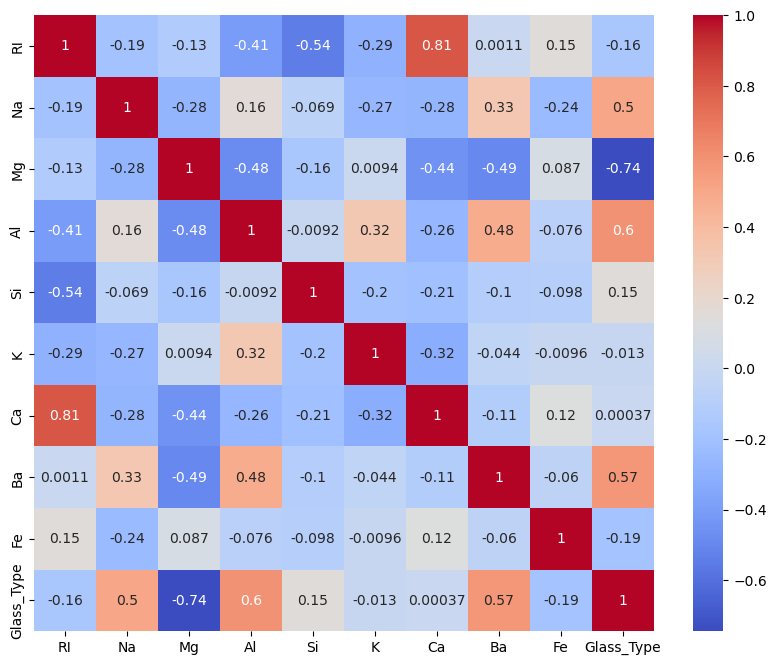

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

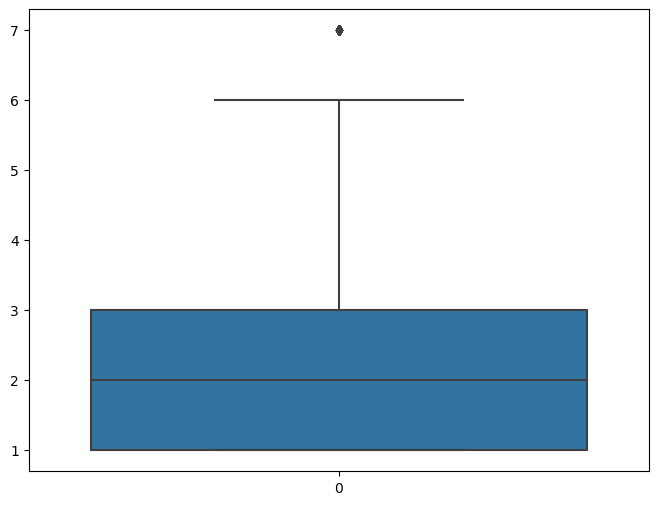

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Glass_Type'])
plt.show()

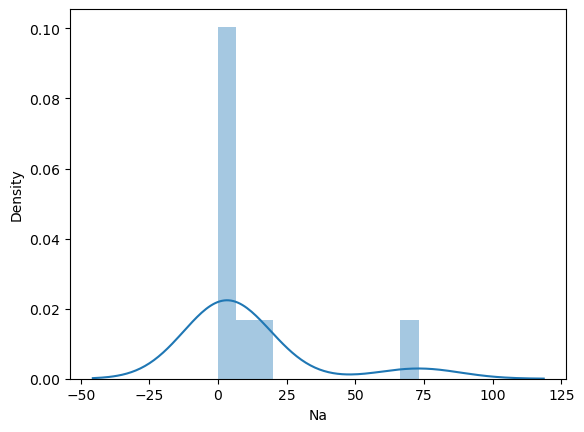

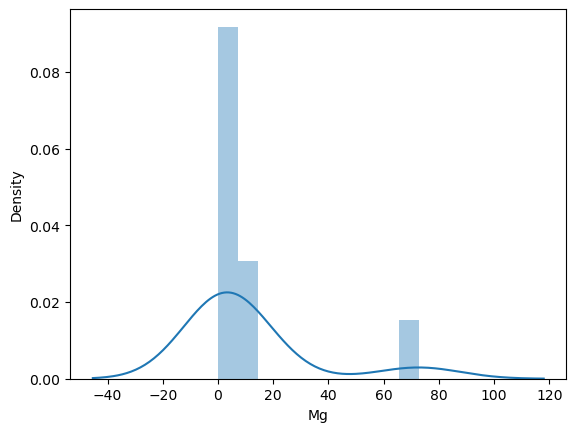

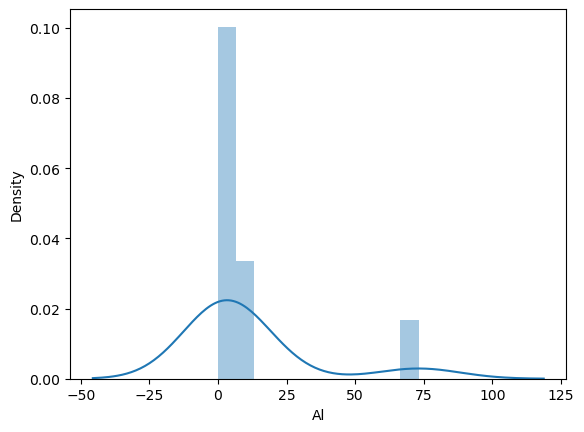

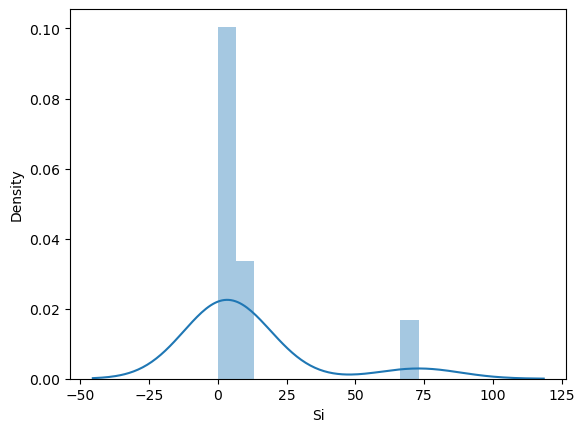

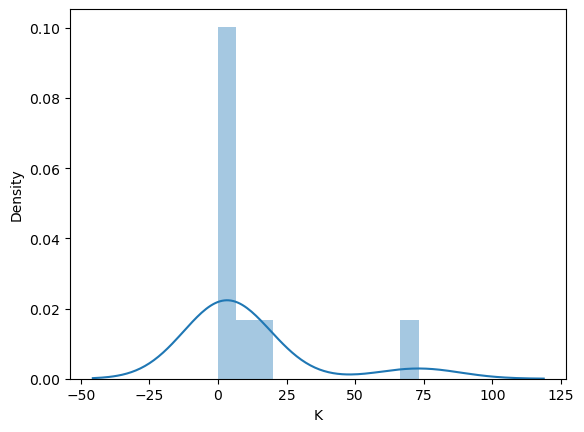

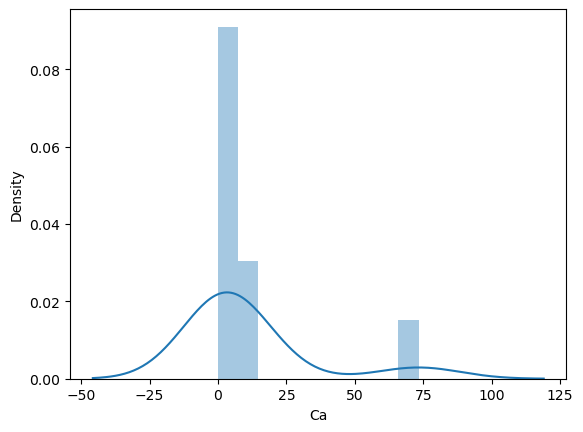

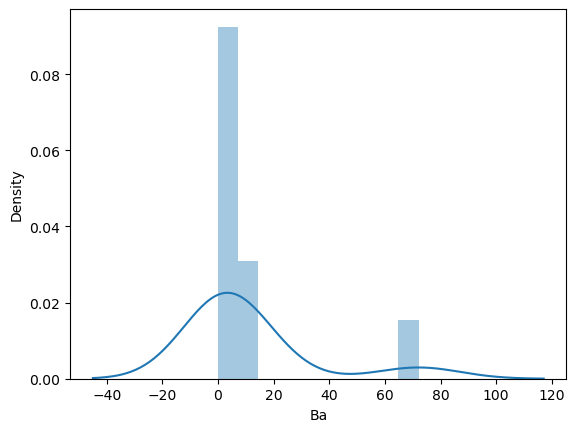

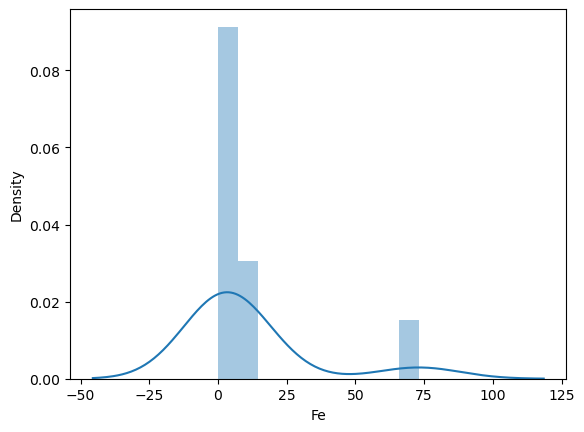

In [25]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['Glass_Type']
x = df[features]
y = df[label]
x2 = x.values
for i in range(1,9):
    sns.distplot(x2[i])
    plt.xlabel(features[i])
    plt.show()